<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio NLP + Sist. Recomendación


En este laboratorio, tabrajaras con datos de reseñas de productos para construir un sistema de recomendación que utilice procesamiento de lenguaje natural (NLP) y *machine learning*. El objetivo principal es que analices el contenido textual de las reseñas, clasifiques las opiniones en categorías (positiva, negativa o neutra) y aproveches esta información para personalizar las recomendaciones. El sistema priorizará los productos con mejores reseñas para usuarios específicos y permitirá evaluar si el análisis de sentimientos mejora la calidad de las recomendaciones. Tareas propuestas:


**Caso 1: Crear un sistema de recomendación**: Debes generar un sistema de recomendación para priorizar productos con las reseñas para cada usuario. Los pasos que deberás seguir son:    

- Estructurar el conjunto de datos

- Sistema basado en contenido


**Caso 2: Clasificar reseñas en positivas, negativas o neutras** Deberás implementar un modelo para analizar las reseñas textuales y clasificarlas en tres categorías:

- Positivas: Si el sentimiento de la reseña es favorable.

- Negativas: Si el sentimiento de la reseña es desfavorable.

- Neutras: Si la reseña no tiene un sentimiento claro.
	
- Pasos :
	- Preprocesamiento de texto: Limpiar las reseñas eliminando caracteres especiales, palabras vacías (stopwords) y realizar lematización.
	
	- Identificar las reseñas positivas, negativas y neutrales. 


Los datos los tendréis en el [siguiente enlace](https://drive.google.com/drive/u/0/folders/1vK5zESy9KElRhm_utg_lHHXuUArrwWgu) con la descipción de cada una de las columnas.  

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import os 
import sys

sys.path.append("../")
# Importamos las clases
# -----------------------------------------------------------------------
from src import soporte_nlp as sn

# Configuración de pandas
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)

# para no tener que hacer el restart del codigo todo el rato
# -----------------------------------------------------------------------
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\develop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\develop\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv("../data/datos.csv", index_col = 0)
df.head(2)


reviewId                                        reviewDate  \
65115   RXDM4W1ZL7L4L    Reviewed in the United States on June 22, 2021   
56720  R2GINAKQJOSWEL  Reviewed in the United States on August 27, 2021   

            mainDepartment       subDepartment  \
65115  Sports and Outdoors  Outdoor Recreation   
56720            Computers      Men's Clothing   

                                             productName  \
65115  Doctor Developed Copper Wrist Brace / Carpal T...   
56720      Fruit of the Loom Men's Coolzone Boxer Briefs   

                      reviewTitle  reviewStar  \
65115  One size does not fit all.         3.0   
56720   They were ok but thats it         4.0   

                                              reviewText  inconsistentStatus  
65115  Nice lightweight brace but unfortunately was t...                   1  
56720  Boxers were ok. The color did start to fade pr...                   0

In [3]:
df = df[['subDepartment','reviewText']]


In [4]:

# eliminamos las filas con valores nulos para evitar los problemas
df = df.dropna(subset=['subDepartment']).reset_index(drop = True)

In [5]:
df.head()

subDepartment                                         reviewText
0   Outdoor Recreation  Nice lightweight brace but unfortunately was t...
1       Men's Clothing  Boxers were ok. The color did start to fade pr...
2  Networking Products  Very easy to install. Worked right away but it...
3                 Bath  The color is completely different than hunter ...
4            Hair Care  From reading the reviews, I was hoping that th...

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   subDepartment  10000 non-null  object
 1   reviewText     9999 non-null   object
dtypes: object(2)
memory usage: 156.4+ KB
None

Descripción del DataFrame:
               count unique               top freq
subDepartment  10000     27  Sports & Fitness  710
reviewText      9999   9928              Nice    7

Distribución de clases en la columna 'subDepartment':
subDepartment
Sports & Fitness                      710
Outdoor Recreation                    706
Makeup                                387
Hair Care                             372
Kitchen and Dining                    363
Men's Accessories                     360
Video games and accessories           360
Laptop Accessories                    357
GPS and Navigation                    353
Heating, Cooling & 

d:\workspace\laboratorio-modulo9-leccion06-nlp\notebooks\..\src\soporte_nlp.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


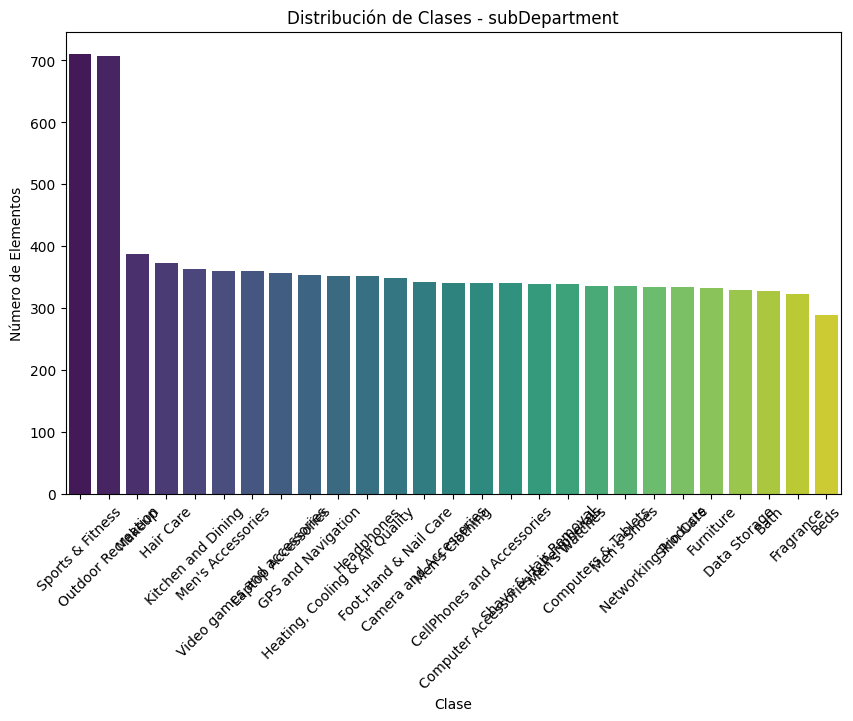

Limpiando el texto...
Texto limpiado y listo.
Generando nubes de palabras...


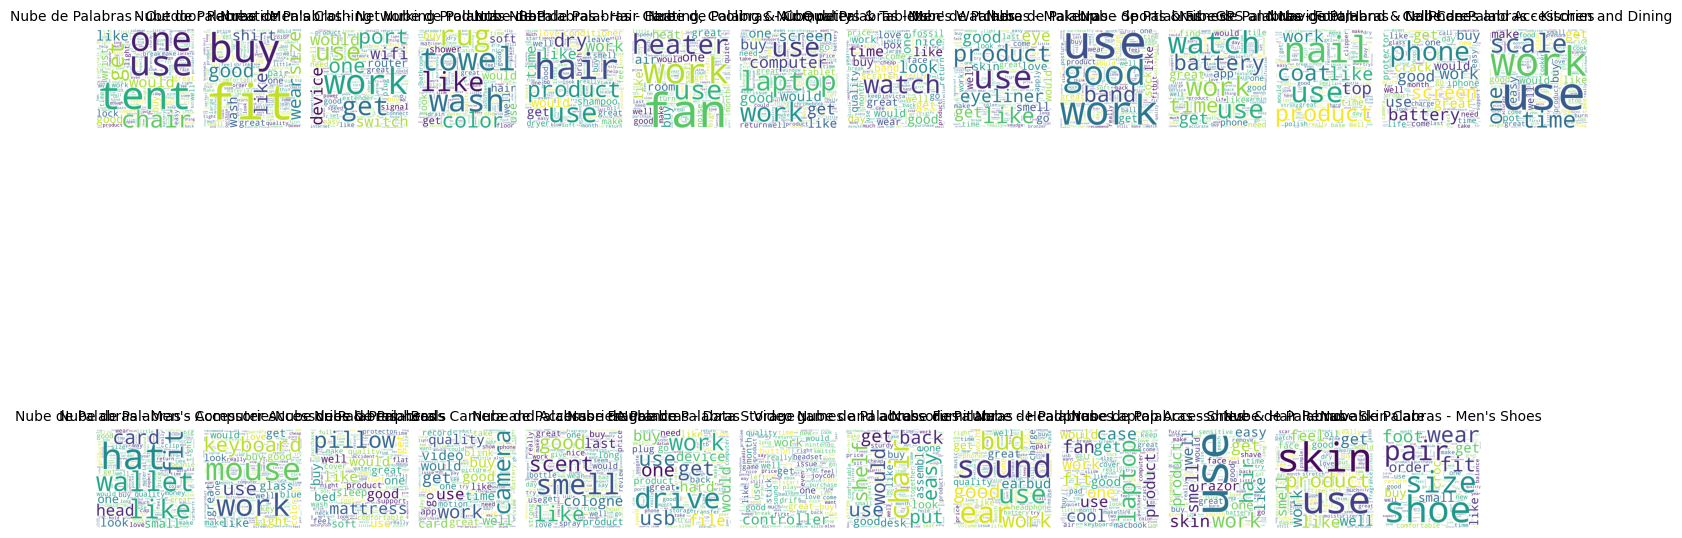

subDepartment                                         reviewText  \
0   Outdoor Recreation  Nice lightweight brace but unfortunately was t...   
1       Men's Clothing  Boxers were ok. The color did start to fade pr...   
2  Networking Products  Very easy to install. Worked right away but it...   
3                 Bath  The color is completely different than hunter ...   
4            Hair Care  From reading the reviews, I was hoping that th...   

                                        cleaned_text  
0  nice lightweight brace unfortunately large wri...  
1  boxer ok color start fade pretty quickly becom...  
2  easy install work right away go far expectedit...  
3  color completely different hunter green andor ...  
4  read review hope shampoo conditioner would ext...

In [6]:
# Instanciar la clase con las columnas relevantes
exploracion = sn.ExploracionText(dataframe=df, text_column='reviewText', label_column='subDepartment', language="english")

# Explorar los datos
exploracion.explorar_datos()

# Limpiar los textos
exploracion.limpiar_textos("cleaned_text")

# Generar nubes de palabras
exploracion.generar_wordclouds()

# Obtener el DataFrame limpio
df_limpio = exploracion.obtener_dataframe_limpio()

# Ver las primeras filas del DataFrame limpio
df_limpio.head()


In [7]:
# instanciamos la clase
representador = sn.RepresentacionTexto(dataframe=df_limpio, text_column='cleaned_text')

# representamos el texto usando  Bag of Words
bow_df = representador.generar_bow()
print("Bag of Words:")
display(bow_df.sample(10))

# representamos el texto usando TF-IDF
tfidf_df = representador.generar_tfidf()
print("TF-IDF:")
display(tfidf_df.sample(10))

# representammos el texto usando  Embeddings
embeddings_df = representador.generar_embeddings()
print("Embeddings:")
display(embeddings_df.sample(10))


Generando Bag of Words...
Bag of Words generado.
Bag of Words:


subDepartment  \
5892                Sports & Fitness   
252            Foot,Hand & Nail Care   
9491                Sports & Fitness   
414   Heating, Cooling & Air Quality   
2147              Outdoor Recreation   
8916              Outdoor Recreation   
1336                       Fragrance   
5411                   Men's Watches   
4815            Shave & Hair Removal   
8227              Laptop Accessories   

                                             reviewText  \
5892  I liked it for a week. It has a nice display a...   
252   I would buy it again. Beats having to use nail...   
9491  I use this product for simply workouts in the ...   
414                            Definitely puts out heat   
2147  This size of this tent was perfect, we had a q...   
8916  Did not receive batteries as describe in descr...   
1336  5 star longevity cause I cant get the smell ou...   
5411        Really happy with the watch. Looks sharp!!!   
4815  Product received was not Schick. I decided to ...   
8227                               its worth the money!   

                                           cleaned_text  aa  ability  able  \
5892  like week nice display interact well iphone st...   0        0     0   
252   would buy beat use nail polish remover end goo...   0        0     0   
9491   use product simply workout morning great warm up   0        0     0   
414                                 definitely put heat   0        0     0   
2147  size tent perfect queen size blow bed inside a...   0        0     0   
8916  receive battery describe description even list...   0        0     0   
1336  star longevity get smell holy moly buy cheap c...   0        0     0   
5411                      really happy watch look sharp   0        0     0   
4815  product receive schick decide test razor anywa...   0        0     0   
8227                                        worth money   0        0     0   

      abrasive  abs  absolute  absolutely  absorb  absorbency  absorbent  \
5892         0    0         0           0       0           0          0   
252          0    0         0           0       0           0          0   
9491         0    0         0           0       0           0          0   
414          0    0         0           0       0           0          0   
2147         0    0         0           0       0           0          0   
8916         0    0         0           0       0           0          0   
1336         0    0         0           0       0           0          0   
5411         0    0         0           0       0           0          0   
4815         0    0         0           0       0           0          0   
8227         0    0         0           0       0           0          0   

      absurd  abuse  ac  accent  accentuate  accept  acceptable  access  \
5892       0      0   0       0           0       1           0       0   
252        0      0   0       0           0       0           0       0   
9491       0      0   0       0           0       0           0       0   
414        0      0   0       0           0       0           0       0   
2147       0      0   0       0           0       0           0       0   
8916       0      0   0       0           0       0           0       0   
1336       0      0   0       0           0       0           0       0   
5411       0      0   0       0           0       0           0       0   
4815       0      0   0       0           0       0           0       0   
8227       0      0   0       0           0       0           0       0   

      accessible  accessory  accident  accidental  accidentally  accidently  \
5892           0          0         0           0             0           0   
252            0          0         0           0             0           0   
9491           0          0         0           0             0           0   
414            0          0         0           0             0           0   
2147           

Generando representación TF-IDF...
Representación TF-IDF generada.
TF-IDF:


subDepartment  \
2907     GPS and Navigation   
1825    Networking Products   
1505          Men's Watches   
8816  Foot,Hand & Nail Care   
207     Networking Products   
6470     Outdoor Recreation   
6451   Shave & Hair Removal   
5750     Outdoor Recreation   
2284           Data Storage   
1411      Men's Accessories   

                                             reviewText  \
2907  I don't like the fact that the magnet is attac...   
1825  My router doesn't reach the bottom or top leve...   
1505                                    Amazing product   
8816  I've been sandwhiching my my old polish with g...   
207   The "smart" features are somewhat limited but ...   
6470  After dealing with candles during a power outa...   
6451  I have been dermaplaning for about a year and ...   
5750  Cheap chair for the price. Not what I expected...   
2284  Starting making terrible sounds after a slight...   
1411  Way too tight and small, unnecessarily so. The...   

                                           cleaned_text   aa  ability  able  \
2907  like fact magnet attach tracker velcro also li...  0.0      0.0   0.0   
1825  router reach bottom top level split level hous...  0.0      0.0   0.0   
1505                                    amazing product  0.0      0.0   0.0   
8816  sandwhiche old polish great success last week ...  0.0      0.0   0.0   
207   smart feature somewhat limited job support vla...  0.0      0.0   0.0   
6470  deal candle power outage find really great cut...  0.0      0.0   0.0   
6451  dermaplane year use another expensive brand ra...  0.0      0.0   0.0   
5750  cheap chair price expect brand could buy ozark...  0.0      0.0   0.0   
2284  start make terrible sound slight movement plac...  0.0      0.0   0.0   
1411  way tight small unnecessarily length everythin...  0.0      0.0   0.0   

      abrasive  abs  absolute  absolutely  absorb  absorbency  absorbent  \
2907       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
1825       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
1505       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
8816       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
207        0.0  0.0       0.0         0.0     0.0         0.0        0.0   
6470       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
6451       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
5750       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
2284       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
1411       0.0  0.0       0.0         0.0     0.0         0.0        0.0   

      absurd  abuse   ac  accent  accentuate  accept  acceptable  access  \
2907     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
1825     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
1505     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
8816     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
207      0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
6470     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
6451     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
5750     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
2284     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
1411     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   

      accessible  accessory  accident  accidental  accidentally  accidently  \
2907         0.0        0.0       0.0         0.0           0.0         0.0   
1825         0.0        0.0       0.0         0.0           0.0         0.0   
1505         0.0        0.0       0.0         0.0           0.0         0.0   
8816         0.0        0.0       0.0         0.0           0.0         0.0   
207          0.0        0.0       0.0         0.0           0.0         0.0   
6470

Generando embeddings...
Embeddings generados.
Embeddings:


subDepartment  \
8361              Camera and Accessories   
6938  Computer Accessories & Peripherals   
4067                  Laptop Accessories   
6965                Shave & Hair Removal   
5155  Computer Accessories & Peripherals   
9057                        Data Storage   
6963                    Sports & Fitness   
9900                           Fragrance   
5765                    Sports & Fitness   
3209                  Kitchen and Dining   

                                             reviewText  \
8361  The charging port no longer works, seems the f...   
6938  Is a very nice color... But doesn't have off b...   
4067    Color looked a little old, I got the light blue   
6965  Omg it really works. Everyone should have one....   
5155  Pretty clear to me, didn't notice a difference...   
9057  I'm using it to copy years of photoscans I did...   
6963  I've had a Fitbit One for years and it tracked...   
9900         Fake not the real thing scent doesn’t last   
5765                                 Mine cane used -.-   
3209  The scale was not able to weigh the correct we...   

                                           cleaned_text  embedding_0  \
8361    charge port long work seem fin actual port bent     0.008775   
6938                                  nice color button     0.035069   
4067               color look little old get light blue     0.002691   
6965   omg really work everyone one definitely purchase     0.376793   
5155  pretty clear notice difference give little blu...     0.181432   
9057  use copy year photoscan daughter try use tb th...    -0.013001   
6963  fitbit one year track step really well issue s...    -0.106997   
9900                         fake real thing scent last     0.497948   
5765                                      mine cane use     0.344342   
3209                    scale able weigh correct weight    -0.111442   

      embedding_1  embedding_2  embedding_3  embedding_4  embedding_5  \
8361    -0.276113     0.467634    -0.046187     0.059610    -0.115706   
6938    -0.430527     0.098336     0.129862     0.584814     0.120731   
4067     0.072026     0.524410    -0.167479     0.343685    -0.502954   
6965     0.169808     0.632527    -0.090727     0.096064    -0.372547   
5155     0.062525     0.493354    -0.297465     0.378541     0.159643   
9057     0.108103     0.426481     0.189751     0.612832    -0.156717   
6963    -0.033186     0.659050    -0.042804     0.489671    -0.150139   
9900    -0.304668     0.293247    -0.021048     0.179383    -0.076155   
5765     0.324208    -0.535960     0.062819     0.339383    -0.041824   
3209    -0.184872     0.165513     0.151410     0.019764    -0.242847   

      embedding_6  embedding_7  embedding_8  embedding_9  embedding_10  \
8361     0.168640     0.048498    -0.040652    -0.178163      0.164942   
6938    -0.022134     0.146988     0.042016    -0.172075      0.227708   
4067     0.354538     0.341978     0.217456    -0.444323      0.081832   
6965     0.263026     0.504629     0.171183    -0.364636      0.277549   
5155     0.380422     0.212272    -0.149185    -0.196346      0.370423   
9057    -0.058139     0.215991     0.159109    -0.108485      0.107965   
6963     0.063199     0.159079     0.033039    -0.420128      0.087289   
9900     0.379646     0.278611     0.276028    -0.103606      0.139109   
5765     0.417788     0.477772     0.018399    -0.180447     -0.073706   
3209     0.271519    -0.227836    -0.002827    -0.273325      0.480895   

      embedding_11  embedding_12  embedding_13  embedding_14  embedding_15  \
8361      0.044347      0.153007      0.235858     -0.430930      0.094121   
6938     -0.185094     -0.011530      0.092174     -0.566836      0.004654   
4067     -0.343154      0.132009      0.611951     -0.855501      0.261362   
6965     -0.117057      0.035592      0.534000     -0.783912      0.090979   
5155     -0.238618      0.055081      0.401278     -0.953401     -0.040719   
9057      0.

In [8]:
embeddings_df.shape

(10000, 771)

Aplicando PCA para reducir 768 dimensiones a 50 dimensiones...
Reducción completada. Nuevas dimensiones agregadas al DataFrame.


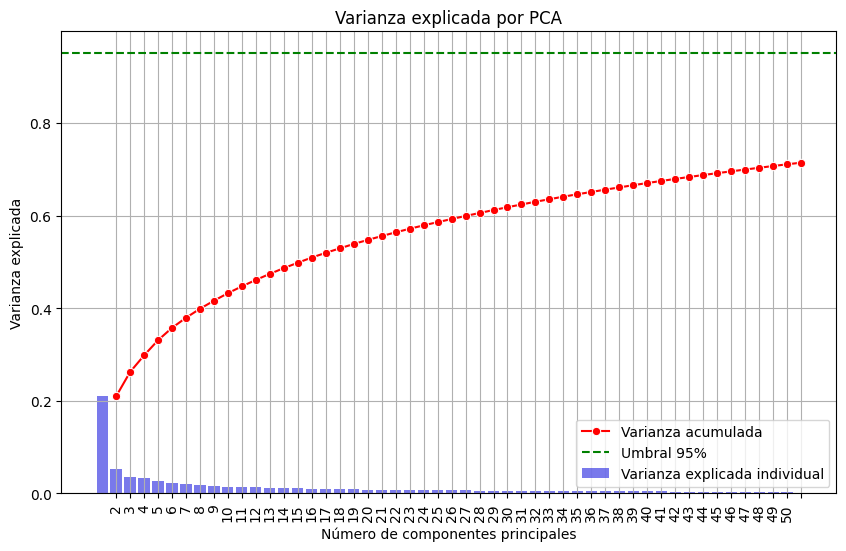

subDepartment                                         reviewText  \
0   Outdoor Recreation  Nice lightweight brace but unfortunately was t...   
1       Men's Clothing  Boxers were ok. The color did start to fade pr...   
2  Networking Products  Very easy to install. Worked right away but it...   
3                 Bath  The color is completely different than hunter ...   
4            Hair Care  From reading the reviews, I was hoping that th...   

                                        cleaned_text  pca_componente_0  \
0  nice lightweight brace unfortunately large wri...          1.738611   
1  boxer ok color start fade pretty quickly becom...          1.355272   
2  easy install work right away go far expectedit...          1.172380   
3  color completely different hunter green andor ...         -0.614810   
4  read review hope shampoo conditioner would ext...          1.649754   

   pca_componente_1  pca_componente_2  pca_componente_3  pca_componente_4  \
0          0.152096          0.534141          1.832110         -0.816322   
1          0.458492         -0.802558         -0.301389         -0.158522   
2          0.192169          1.661863         -0.464872          0.199373   
3          1.366463          0.033115         -0.170324          0.379125   
4          1.405461         -0.461965          1.296250          1.136927   

   pca_componente_5  pca_componente_6  pca_componente_7  pca_componente_8  \
0         -1.244745          1.722020          1.459970          1.009784   
1          0.141087          0.751444         -0.718584          0.725925   
2         -0.554890          0.587701         -0.314332         -0.909666   
3         -0.534526         -1.089790          0.745800         -0.056248   
4          0.547935         -1.269538          0.139595          0.209027   

   pca_componente_9  pca_componente_10  pca_componente_11  pca_componente_12  \
0          0.882299           0.135578          -0.165954          -0.182332   
1         -0.804344           0.458621          -0.497514          -0.060458   
2          0.361948           1.770641          -0.471117           0.258072   
3         -1.611180           0.816055           0.083503           0.162007   
4         -0.236300           0.056385           0.057113           0.357153   

   pca_componente_13  pca_componente_14  pca_componente_15  pca_componente_16  \
0           0.251779           0.725212           0.229637           0.080232   
1           0.871171           0.451823           0.104462          -0.301944   
2           0.017059           0.128617           0.044808           0.786050   
3          -0.255736          -0.253314          -0.664981          -0.305911   
4          -0.172052           0.205548           0.094611           0.547622   

   pca_componente_17  pca_componente_18  pca_componente_19  pca_componente_20  \
0          -0.739866           0.111892           0.207432          -0.426197   
1           0.662372           0.455220          -0.655192          -0.152929   
2           0.389980           0.415541          -0.342177           0.388551   
3           1.304921          -0.739850           0.183743           0.350289   
4           0.340682          -0.071392           0.332725           0.382343   

   pca_componente_21  pca_componente_22  pca_componente_23  pca_componente_24  \
0          -0.433528          -0.001693          -0.401691           0.390502   
1          -0.259620           0.043931           0.539019          -0.709168   
2           0.054832           0.559117           0.136166           0.064887   
3          -0.286538          -1.027641          -0.482453          -1.005213   
4          -0.138290           0.173985          -0.243955          -0.063370   

   pca_componente_25  pca_componente_26  pca_componente_27  pca_componente_28  \
0          -0.242509           0.053073          -0.074080          -0.351965   
1           0.602625          -0.521709           0.018650          -0.

In [9]:
# Instanciar la clase para reducción de dimensionalidad
reductor_pca = sn.ReduccionDimensionalidadPCA(n_componentes=50)

# Lista de columnas de embeddings a reducir
columnas_embeddings = [f"embedding_{i}" for i in range(768)]

# Aplicar reducción de dimensionalidad
df_reducido_emb = reductor_pca.ajustar_transformar(embeddings_df, columnas_embeddings)

# Mostrar la varianza explicada por los componentes principales
varianza_acumulada = reductor_pca.explicar_varianza(mostrar_grafico=True)

# El DataFrame 'df_reducido' contiene las nuevas columnas reducidas como 'pca_componente_0', ..., 'pca_componente_49'
df_reducido_emb.head()

In [10]:
# Rellenar valores nulos y forzar a tipo texto
df['reviewText'] = df['reviewText'].fillna("").astype(str)

Aplicando PCA para reducir 5000 dimensiones a 50 dimensiones...
Reducción completada. Nuevas dimensiones agregadas al DataFrame.


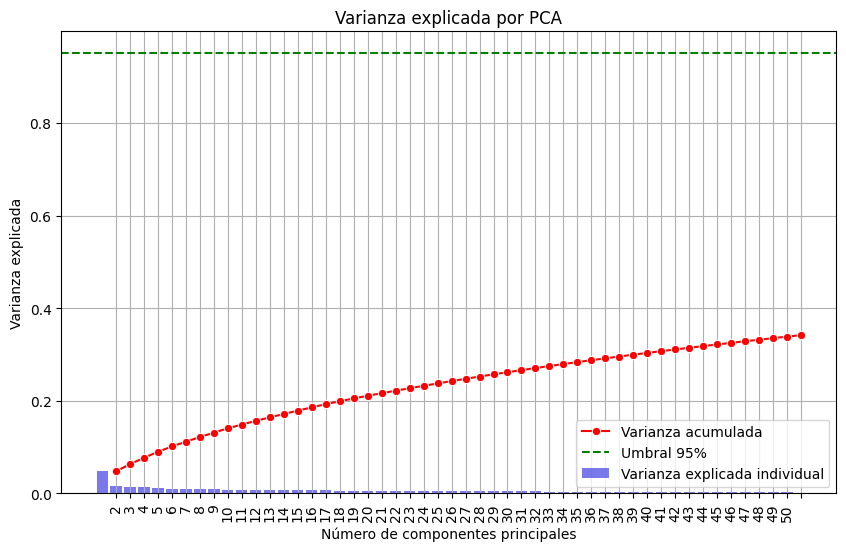

subDepartment                                         reviewText  \
0   Outdoor Recreation  Nice lightweight brace but unfortunately was t...   
1       Men's Clothing  Boxers were ok. The color did start to fade pr...   
2  Networking Products  Very easy to install. Worked right away but it...   
3                 Bath  The color is completely different than hunter ...   
4            Hair Care  From reading the reviews, I was hoping that th...   

                                        cleaned_text  pca_componente_0  \
0  nice lightweight brace unfortunately large wri...         -0.565127   
1  boxer ok color start fade pretty quickly becom...         -0.616673   
2  easy install work right away go far expectedit...         -0.155211   
3  color completely different hunter green andor ...         -0.670184   
4  read review hope shampoo conditioner would ext...          0.031709   

   pca_componente_1  pca_componente_2  pca_componente_3  pca_componente_4  \
0         -0.126621         -0.176575          0.016745         -0.053898   
1         -0.027758         -0.181384          0.117709         -0.052374   
2         -0.334499          0.443105          0.339243          0.011910   
3         -0.021850         -0.097107          0.015829         -0.074660   
4         -0.266229          0.678096          0.060002          0.864069   

   pca_componente_5  pca_componente_6  pca_componente_7  pca_componente_8  \
0         -0.017655         -0.142719         -0.104513          0.127576   
1         -0.016752         -0.078104         -0.029736         -0.020122   
2         -0.307087         -0.297104          0.355266         -0.543231   
3         -0.010710          0.004162         -0.123150          0.118944   
4         -0.050491         -0.078219          0.101152          0.474916   

   pca_componente_9  pca_componente_10  pca_componente_11  pca_componente_12  \
0         -0.095764           0.009834           0.231393          -0.050678   
1          0.098149          -0.005127           0.028824           0.003246   
2          0.164455          -0.478371          -0.034787          -0.072765   
3          0.064611           0.039095           0.094145          -0.026123   
4         -0.260080          -0.762147          -0.641513          -0.195726   

   pca_componente_13  pca_componente_14  pca_componente_15  pca_componente_16  \
0           0.058748          -0.386017          -0.134521          -0.182020   
1           0.155036           0.008033          -0.115638          -0.158069   
2          -0.347276           0.209801          -0.101107          -0.115282   
3          -0.021428          -0.108090          -0.011743          -0.039249   
4           0.294638          -0.592674           0.721340          -0.025562   

   pca_componente_17  pca_componente_18  pca_componente_19  pca_componente_20  \
0           0.493598           0.132137          -0.094772           0.475229   
1          -0.040963          -0.136473           0.117309           0.065994   
2           0.195383          -0.198653          -0.220902          -0.123275   
3          -0.058166          -0.050292           0.086257          -0.121151   
4          -0.131582           0.115077          -0.067934          -0.092067   

   pca_componente_21  pca_componente_22  pca_componente_23  pca_componente_24  \
0           0.316850          -0.001760           0.240441           0.122705   
1           0.064141          -0.046295           0.088260          -0.110206   
2          -0.270485          -0.096932          -0.178153          -0.027437   
3          -0.066178          -0.133579           0.108207           0.082381   
4           0.024606          -0.018661          -0.165098          -0.291899   

   pca_componente_25  pca_componente_26  pca_componente_27  pca_componente_28  \
0          -0.366193          -0.156658           0.373508           0.320068   
1           0.051058           0.170948           0.002310           0.

In [11]:
# Seleccionar columnas numéricas para reducir
columnas_a_reducir_bow = bow_df.columns.difference(['reviewText', 'subDepartment', 'cleaned_text'])


# Aplicar reducción de dimensionalidad
df_reducido_bow = reductor_pca.ajustar_transformar(bow_df, columnas_a_reducir_bow)

# Mostrar la varianza explicada por los componentes principales
varianza_acumulada_bow = reductor_pca.explicar_varianza(mostrar_grafico=True)

# El DataFrame 'df_reducido' contiene las nuevas columnas reducidas como 'pca_componente_0', ..., 'pca_componente_49'
df_reducido_bow.head()

Aplicando PCA para reducir 5000 dimensiones a 50 dimensiones...
Reducción completada. Nuevas dimensiones agregadas al DataFrame.


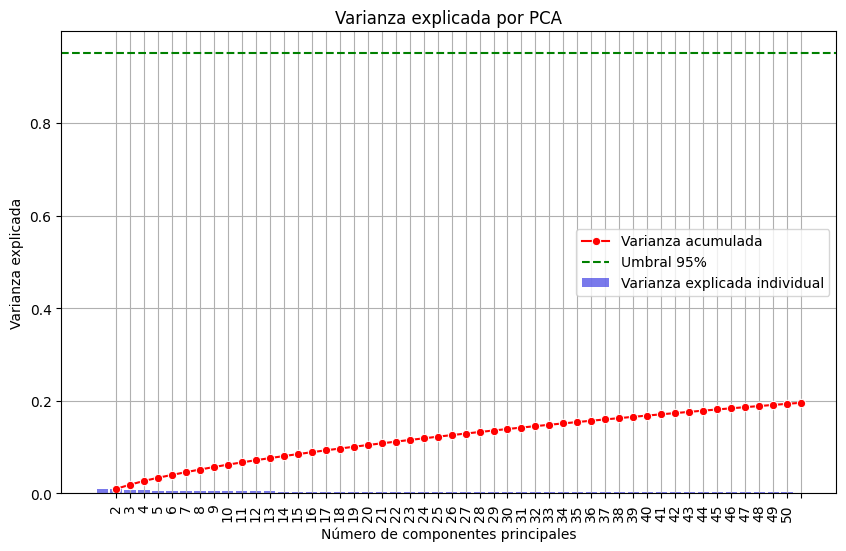

subDepartment                                         reviewText  \
0   Outdoor Recreation  Nice lightweight brace but unfortunately was t...   
1       Men's Clothing  Boxers were ok. The color did start to fade pr...   
2  Networking Products  Very easy to install. Worked right away but it...   
3                 Bath  The color is completely different than hunter ...   
4            Hair Care  From reading the reviews, I was hoping that th...   

                                        cleaned_text  pca_componente_0  \
0  nice lightweight brace unfortunately large wri...         -0.072774   
1  boxer ok color start fade pretty quickly becom...         -0.047274   
2  easy install work right away go far expectedit...          0.098816   
3  color completely different hunter green andor ...         -0.039113   
4  read review hope shampoo conditioner would ext...          0.067082   

   pca_componente_1  pca_componente_2  pca_componente_3  pca_componente_4  \
0         -0.048520         -0.003398         -0.117301          0.064561   
1          0.004796          0.015612         -0.048523          0.014821   
2          0.183000         -0.097025          0.003166         -0.066661   
3         -0.037839          0.002508         -0.032803          0.026570   
4         -0.029712         -0.061516          0.051504          0.033737   

   pca_componente_5  pca_componente_6  pca_componente_7  pca_componente_8  \
0         -0.032363          0.089182          0.122801          0.106435   
1          0.008406         -0.017091         -0.018442          0.041439   
2          0.104264         -0.069946          0.117237          0.031620   
3          0.022151         -0.011145         -0.013105          0.030437   
4         -0.031764          0.012377          0.039365         -0.032837   

   pca_componente_9  pca_componente_10  pca_componente_11  pca_componente_12  \
0         -0.045878          -0.088200           0.092075           0.043547   
1          0.046148          -0.014402          -0.059624          -0.019921   
2         -0.002216          -0.001872          -0.113050          -0.024109   
3          0.022161          -0.019505          -0.039871          -0.002619   
4          0.162349           0.060955           0.033909           0.162131   

   pca_componente_13  pca_componente_14  pca_componente_15  pca_componente_16  \
0           0.008781          -0.030351          -0.019761           0.019445   
1           0.055726           0.036328           0.005806          -0.010140   
2           0.001583          -0.084693          -0.007172          -0.008028   
3          -0.021962           0.024703           0.014571          -0.014507   
4          -0.005437           0.027335          -0.024522           0.019271   

   pca_componente_17  pca_componente_18  pca_componente_19  pca_componente_20  \
0           0.007518          -0.011427           0.017723           0.000037   
1          -0.035872          -0.007326          -0.006046          -0.070053   
2          -0.171071           0.012570           0.175365           0.023124   
3           0.022436          -0.011762          -0.023176          -0.018427   
4          -0.013087           0.081579          -0.003266          -0.015930   

   pca_componente_21  pca_componente_22  pca_componente_23  pca_componente_24  \
0          -0.049664           0.008450          -0.018063          -0.011504   
1           0.017718           0.259487           0.076785           0.101173   
2           0.100504          -0.032633          -0.055396          -0.120387   
3           0.033703          -0.006861           0.010518          -0.041759   
4          -0.014286          -0.005519           0.016287           0.004320   

   pca_componente_25  pca_componente_26  pca_componente_27  pca_componente_28  \
0           0.017893           0.028277           0.011572          -0.005499   
1          -0.073145          -0.015060          -0.017681          -0.

In [12]:
# Seleccionar columnas numéricas para reducir
columnas_a_reducir_tf = bow_df.columns.difference(['reviewText', 'subDepartment', 'cleaned_text'])


# Aplicar reducción de dimensionalidad
df_reducido_tf = reductor_pca.ajustar_transformar(tfidf_df, columnas_a_reducir_tf)

# Mostrar la varianza explicada por los componentes principales
varianza_acumulada_tf = reductor_pca.explicar_varianza(mostrar_grafico=True)

# El DataFrame 'df_reducido' contiene las nuevas columnas reducidas como 'pca_componente_0', ..., 'pca_componente_49'
df_reducido_tf.head()

In [13]:
# Crear un diccionario de mapeo
valores_unicos = df_reducido_emb['subDepartment'].unique()
mapear_status = {value: i for i, value in enumerate(valores_unicos)}
df_reducido_emb["subDepartment"] = df_reducido_emb["subDepartment"].map(mapear_status)

X = df_reducido_emb.iloc[:, 3:]
y = df_reducido_emb["subDepartment"]

In [14]:
clasificador = sn.ClasificacionTextoAvanzada(modelo="random_forest")

X_train, X_test, y_train, y_test = clasificador.dividir_datos(X, y, test_size=0.3)

# Entrenamiento
clasificador.entrenar(X_train, y_train)

# Validación cruzada
clasificador.validar(X_train, y_train)

parametros = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

clasificador.ajustar_hyperparametros(X_train, y_train, parametros)

Dividiendo datos: 30.0% para prueba.
Tamaño del conjunto de entrenamiento: 7000
Tamaño del conjunto de prueba: 3000
Entrenando modelo...
Modelo entrenado.
Realizando validación cruzada...
Puntuaciones de validación cruzada: [0.40228117 0.37809908 0.38035497 0.38197346 0.36283585]
Puntuación media: 0.3811
Buscando los mejores hiperparámetros...
Mejores parámetros encontrados: {'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Modelo actualizado con los mejores parámetros.


In [15]:
df_limpio.head()

subDepartment                                         reviewText  \
0   Outdoor Recreation  Nice lightweight brace but unfortunately was t...   
1       Men's Clothing  Boxers were ok. The color did start to fade pr...   
2  Networking Products  Very easy to install. Worked right away but it...   
3                 Bath  The color is completely different than hunter ...   
4            Hair Care  From reading the reviews, I was hoping that th...   

                                        cleaned_text  
0  nice lightweight brace unfortunately large wri...  
1  boxer ok color start fade pretty quickly becom...  
2  easy install work right away go far expectedit...  
3  color completely different hunter green andor ...  
4  read review hope shampoo conditioner would ext...

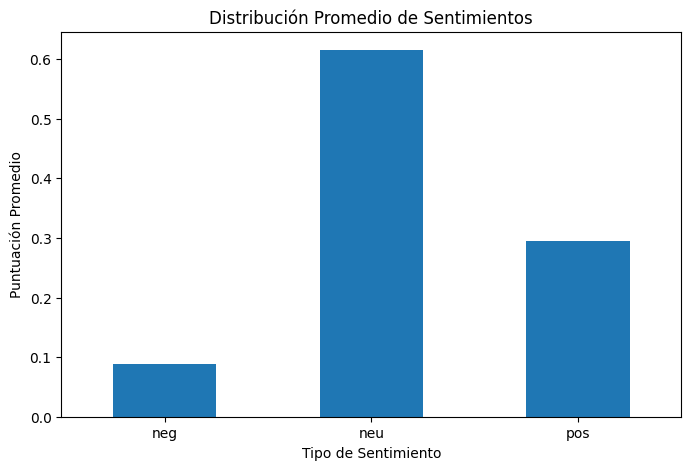

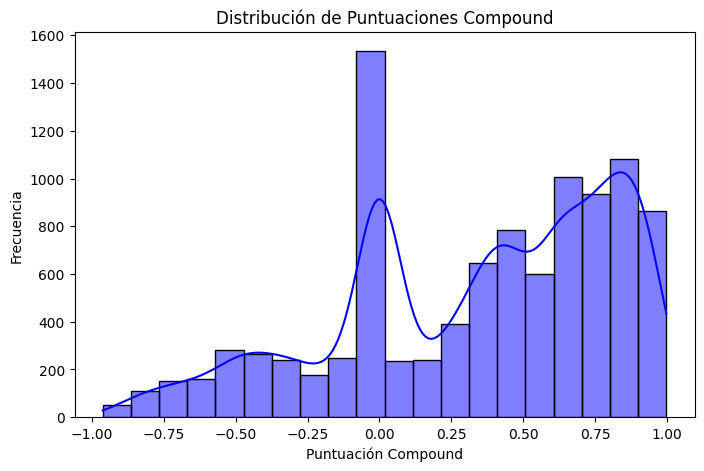

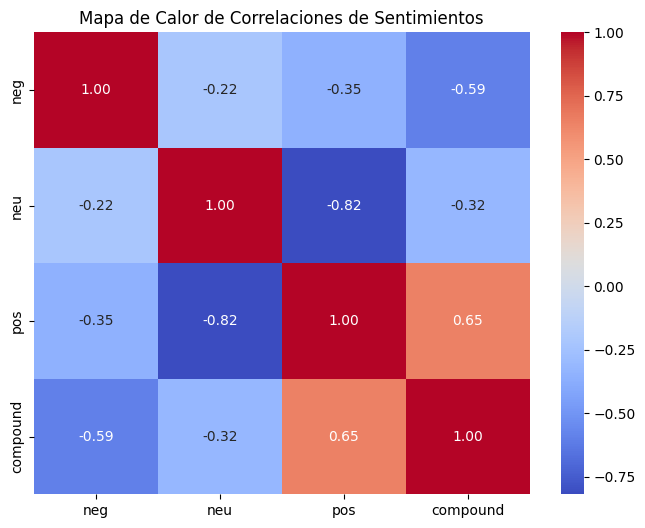

subDepartment                                         reviewText  \
0   Outdoor Recreation  Nice lightweight brace but unfortunately was t...   
1       Men's Clothing  Boxers were ok. The color did start to fade pr...   
2  Networking Products  Very easy to install. Worked right away but it...   
3                 Bath  The color is completely different than hunter ...   
4            Hair Care  From reading the reviews, I was hoping that th...   

                                        cleaned_text    neg    neu    pos  \
0  nice lightweight brace unfortunately large wri...  0.121  0.603  0.276   
1  boxer ok color start fade pretty quickly becom...  0.138  0.539  0.323   
2  easy install work right away go far expectedit...  0.000  0.523  0.477   
3  color completely different hunter green andor ...  0.000  1.000  0.000   
4  read review hope shampoo conditioner would ext...  0.000  0.541  0.459   

   compound  
0    0.4767  
1    0.4767  
2    0.8020  
3    0.0000  
4    0.8979

In [16]:
# Instanciar la clase
analisis_sentimientos = sn.AnalisisSentimientos(df_limpio, columna_texto='cleaned_text')

# Generar gráficos
analisis_sentimientos.graficar_distribucion_sentimientos() 
analisis_sentimientos.graficar_distribucion_compound()
analisis_sentimientos.graficar_mapa_calor_sentimientos()
analisis_sentimientos.obtener_datos_df().head()